Importing the Necessary Modules

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
import random
import json
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Connecting to the Database

In [2]:
db_username_0 = 'simulationuser'
db_password_0 = 'simulations2024'
db_host_0 = 'localhost'
db_port_0 = '5432'
db_name_0 = 'simulations_data'
table_name_0 = 'neutral_ensembles'

In [3]:
connection_string = f"postgresql://{db_username_0}:{db_password_0}@{db_host_0}:{db_port_0}/{db_name_0}"
engine = create_engine(connection_string)
query = f"SELECT * FROM {table_name_0}"
df = pd.read_sql(query, engine)
# df = df.iloc[:10000]

The DataFrame

In [4]:
len(df)

19548

Verifying Details

Defining Common Functions

In [5]:
def average_arrays(*arrays):
    if not arrays:
        raise ValueError("No arrays provided for averaging.")
    
    np_arrays = [np.array(arr) for arr in arrays]
    array_lengths = [len(arr) for arr in np_arrays]

    if len(set(array_lengths)) != 1:
        raise ValueError("All input arrays must have the same length.")
    
    average_array = np.mean(np_arrays, axis=0)
    
    return average_array

Composite Analysis of All the Data

In [6]:
average_psi_e = average_arrays(*list(df['psi_e']))
average_b_e = average_arrays(*list(df['b_e']))
average_psi_plus = average_arrays(*list(df['psi_plus']))
average_b_plus = average_arrays(*list(df['b_plus']))
average_U = average_arrays(*list(df['u_list']))
average_R = average_arrays(*list(df['r_list']))
average_k_e_psi_e_list = average_arrays(*list(df['k_e_psi_e_list']))
average_k_e_b_e_list = average_arrays(*list(df['k_e_b_e_list']))
average_k_e_psi_plus_list = average_arrays(*list(df['k_e_psi_plus_list']))
average_k_e_b_plus_list = average_arrays(*list(df['k_e_b_plus_list']))
average_heat_flux_psi_e_b_e_list = average_arrays(*list(df['heat_flux_psi_e_b_e_list']))
average_heat_flux_psi_e_b_plus_list = average_arrays(*list(df['heat_flux_psi_e_b_plus_list']))
average_b_e_psi_plus_list = average_arrays(*list(df['b_e_psi_plus_list']))
average_b_e_b_plus_list = average_arrays(*list(df['b_e_b_plus_list']))
average_psi_plus_b_plus_list = average_arrays(*list(df['psi_plus_b_plus_list']))
average_eta = average_arrays(*list(df['eta_list']))

In [7]:
window_size = 5000
dt = .001
epsilon = 0.12394270273516043
N_0_squared = 318.8640217310387

In [8]:
epsilon = 0.12394270273516043
N_0_squared = 318.8640217310387
r_m = 0.1
k = 2 * np.pi * 6
m = 2 * np.pi * 3
m_u = 2 * np.pi * 7
dt = 0.001
total_time = 200
k_e_square = k**2 + m**2
k_plus_square = k**2 + (m + m_u)**2

In [9]:
p = k / k_e_square
q = -k / k_plus_square
r = k * N_0_squared
s = -k * (k_plus_square - m_u**2) / (2*k_e_square)
t = -k * (m_u**2 - k_e_square) / (2 * k_plus_square)
v = k / 2

In [10]:
bigW = np.array([[-1, p, 0, 0], [-r, -1, 0, 0], [0, 0, -1, q], [0, 0, r, -1]])
bigL = np.array([[0, 0, s, 0], [0, 0, 0, v], [t, 0, 0, 0], [0, -v, 0, 0]])
bigQ = np.array([[8/k_e_square, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]])

In [11]:
def std_across_axis(arrays):
    """
    Calculate the standard deviation across axis 1 for a list or array of 2D numpy arrays.
    Returns a single array of standard deviations for each array in the input.
    
    Parameters:
        arrays (array-like): List or array of shape (N, M) or (N, M, ...) where N is the number of arrays.
        
    Returns:
        np.ndarray: Array of standard deviations, shape (N,).
    """
    # arrays = np.asarray(arrays)
    return np.std(arrays, axis=0)

In [12]:
time_array = np.linspace(-5, 5, int(10/.01))

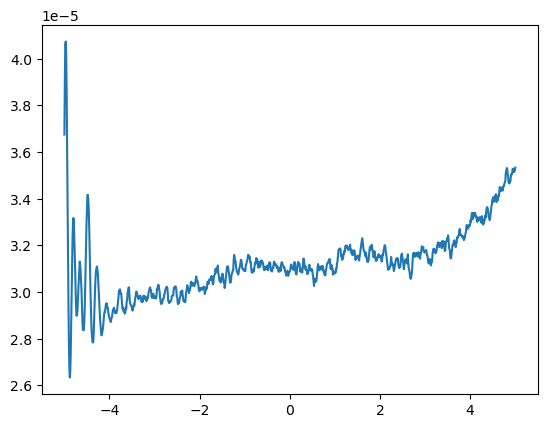

In [13]:
plt.plot(time_array, average_U * average_k_e_psi_e_list)

In [14]:
U_k_e_psi_e = np.array([
    np.array(u) * np.array(k)
    for u, k in zip(df['u_list'], df['k_e_psi_e_list'])
])

U_k_e_psi_e_stdev = std_across_axis(U_k_e_psi_e)

In [15]:
U_k_e_psi_e_average = average_arrays(*list(U_k_e_psi_e))

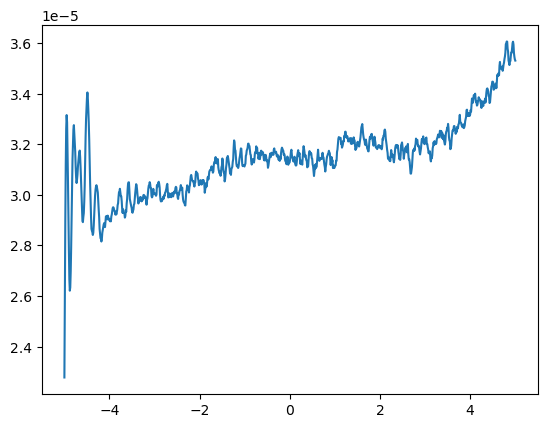

In [16]:
plt.plot(time_array, U_k_e_psi_e_average)

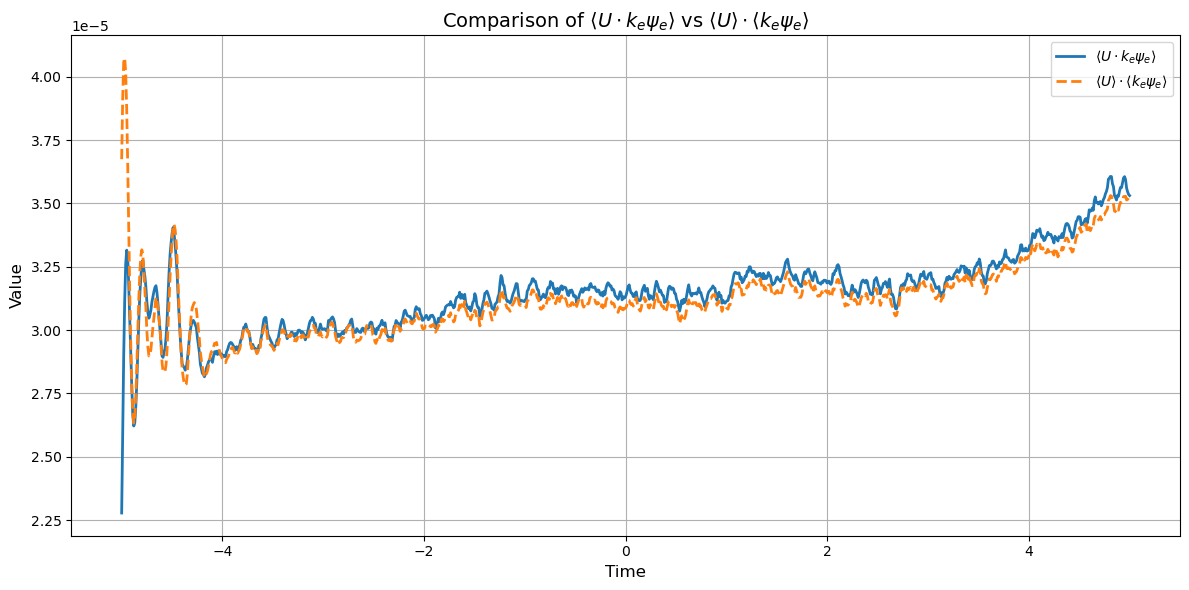

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(time_array, U_k_e_psi_e_average, label=r'$\langle U \cdot k_{e}\psi_{e} \rangle$', linewidth=2)
ax.plot(time_array, average_U * average_k_e_psi_e_list, 
        label=r'$\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', linestyle='--', linewidth=2)

ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title(r'Comparison of $\langle U \cdot k_{e}\psi_{e} \rangle$ vs $\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', fontsize=14)
ax.legend(fontsize=10)
ax.grid(True)

plt.tight_layout()
plt.show()


#### Temporal Calculations

In [18]:
def std_across_axis(arrays):
    return np.std(arrays, axis=0)

In [19]:
U_k_e_psi_e_stdev = std_across_axis(U_k_e_psi_e)

In [20]:
U_k_e_psi_e_stdev.shape

(1000,)

In [21]:
U_k_e_psi_e_stError = U_k_e_psi_e_stdev/np.sqrt(len(df))

In [22]:
U_k_e_psi_e.shape

(19548, 1000)

In [23]:
U_k_e_psi_e_average = average_arrays(*list(U_k_e_psi_e))

In [24]:
U_k_e_psi_e_average.shape

(1000,)

In [25]:
average_U_Ke_psi_e = average_U * average_k_e_psi_e_list
average_U_Ke_psi_e.shape

(1000,)

In [26]:
std_U = np.std(df['u_list'].tolist(), axis=0)
std_K_e_psi_e = np.std(df['k_e_psi_e_list'].tolist(), axis=0)
std_U.shape, std_K_e_psi_e.shape

((1000,), (1000,))

In [27]:
std_err_U = std_U / np.sqrt(len(df))
std_err_k_e_psi_e = std_K_e_psi_e / np.sqrt(len(df))

In [28]:
st_err_U_K_e_psi_e = average_U * average_k_e_psi_e_list * np.sqrt((std_err_U / average_U) ** 2 + (std_err_k_e_psi_e / average_k_e_psi_e_list) ** 2)
st_err_U_K_e_psi_e.shape

(1000,)

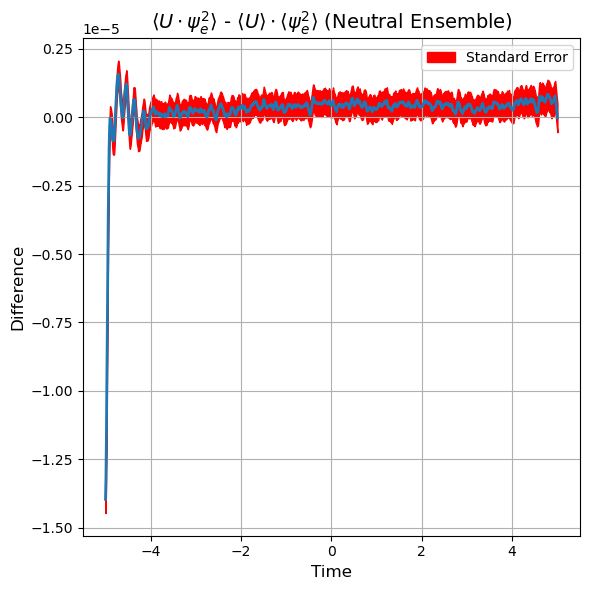

In [39]:
fig, ax = plt.subplots(figsize=(6, 6))
standard_error_diff = np.sqrt(st_err_U_K_e_psi_e ** 2 + U_k_e_psi_e_stError ** 2)
calc_array = U_k_e_psi_e_average - average_U_Ke_psi_e
# ax.plot(time_array, U_k_e_psi_e_average, label=r'$\langle U \cdot k_{e}\psi_{e} \rangle$', linewidth=2)
ax.plot(time_array, calc_array,
         linestyle='-', linewidth=2)

ax.fill_between(time_array, 
                calc_array - standard_error_diff, 
                calc_array + standard_error_diff, 
                alpha=1, label='Standard Error',color='red')

# ax.errorbar(time_array, 
#             U_k_e_psi_e_average - (average_U * average_k_e_psi_e_list), 
#             yerr=standard_error_diff, 
#             label=r'$\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', 
#             linestyle='--', 
#             linewidth=2, 
#             capsize=3)

ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Difference', fontsize=12)
ax.set_title(r'$\langle U \cdot \psi_{e}^2 \rangle$ - $\langle U \rangle \cdot \langle \psi_{e}^2 \rangle$ (Neutral Ensemble)', fontsize=14)
ax.legend(fontsize=10)
ax.grid(True)

plt.tight_layout()
plt.show()


In [30]:
#The small positive offset is due to the SSD slightly underestimating the equilibrium jet strength. 

In [31]:
len(df)

19548